# 1. Введение в анализ и прогнозирование временных рядов

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

## ЭКОСИСТЕМА PYTHON ДЛЯ МАШИННОГО ОБУЧЕНИЯ

## Посмотрим на версии используемых модулей

In [2]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.4.1


In [3]:
# numpy
import numpy
print('numpy: %s' % numpy.__version__)

numpy: 1.16.2


In [4]:
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)

matplotlib: 3.1.1


In [5]:
# pandas
import pandas
print('pandas: %s' % pandas.__version__)

pandas: 0.25.1


In [6]:
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.3


## Python: основы

### Assignment (присвоение)

In [3]:
# Strings
data = 'hello world'
print(data[0])
print(len(data))
print(data)

h
11
hello world


In [4]:
# Numbers
value = 123.1
print(value)
value = 10
print(value)

123.1
10


In [9]:
# Boolean
a = True
b = False
print(a, b)

True False


In [10]:
# Multiple Assignment
a, b, c = 1, 2, 3
print(a, b, c)

1 2 3


In [11]:
# No value
a = None
print(a)

None


### Flow Control (управление потоком)

In [18]:
# If-Then-Else
value = 99
if value == 99:
    print('That is fast')
elif value > 200:
    print('That is too fast')
else:
    print('That is safe')

That is fast


In [17]:
# For-Loop
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [16]:
# While-Loop
i = 0
while i < 10:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9


### Data Structures (структуры данных)

In [19]:
# Tuple (cannot change)
a = (1, 2, 3)
print(a)

(1, 2, 3)


In [20]:
# Lists
mylist = [1, 2, 3]
print("Zeroth Value: %d" % mylist[0])
mylist.append(4)
print("List Length: %d" % len(mylist))
for value in mylist:
	print(value)

Zeroth Value: 1
List Length: 4
1
2
3
4


In [21]:
# Dictionaries
mydict = {'a': 1, 'b': 2, 'c': 3}
print("A value: %d" % mydict['a'])
mydict['a'] = 11
print("A value: %d" % mydict['a'])
print("Keys: %s" % mydict.keys())
print("Values: %s" % mydict.values())
for key in mydict.keys():
	print(mydict[key])

A value: 1
A value: 11
Keys: dict_keys(['a', 'b', 'c'])
Values: dict_values([11, 2, 3])
11
2
3


### Functions (функции)

In [22]:
# Sum function
def mysum(x, y):
    return x + y

In [23]:
# Test sum function
result = mysum(1, 3)
print(result)

4


## NumPy: основы

In [24]:
# define an array
import numpy
mylist = [1, 2, 3]
myarray = numpy.array(mylist)
print(myarray)
print(myarray.shape)

[1 2 3]
(3,)


In [25]:
# access values
import numpy
mylist = [[1, 2, 3], [3, 4, 5]]
myarray = numpy.array(mylist)
print(myarray)
print(myarray.shape)
print("First row: %s" % myarray[0])
print("Last row: %s" % myarray[-1])
print("Specific row and col: %s" % myarray[0, 2])
print("Whole col: %s" % myarray[:, 2])

[[1 2 3]
 [3 4 5]]
(2, 3)
First row: [1 2 3]
Last row: [3 4 5]
Specific row and col: 3
Whole col: [3 5]


In [26]:
# arithmetic
import numpy
myarray1 = numpy.array([2, 2, 2])
myarray2 = numpy.array([3, 3, 3])
print("Addition: %s" % (myarray1 + myarray2))
print("Multiplication: %s" % (myarray1 * myarray2))

Addition: [5 5 5]
Multiplication: [6 6 6]


## Matplotlib: основы

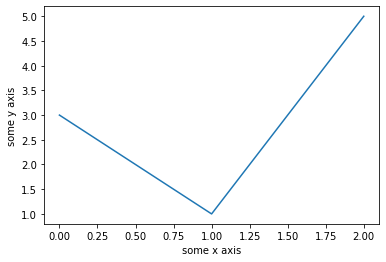

In [31]:
# basic line plot
import matplotlib.pyplot as plt
import numpy
myarray = numpy.array([3,1,5])
plt.plot(myarray)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

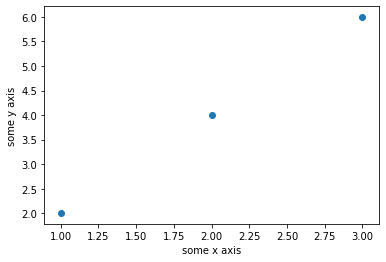

In [29]:
# basic scatter plot
import matplotlib.pyplot as plt
import numpy
x = numpy.array([1, 2, 3])
y = numpy.array([2, 4, 6])
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

## Pandas: основы

In [32]:
# series
import numpy
import pandas
myarray = numpy.array([1, 2, 3])
rownames = ['a', 'b', 'c']
myseries = pandas.Series(myarray, index=rownames)
print(myseries)

a    1
b    2
c    3
dtype: int32


In [33]:
print(myseries[0])
print(myseries['a'])

1
1


In [34]:
# dataframe
import numpy
import pandas
myarray = numpy.array([[1, 2, 3], [4, 5, 6]])
rownames = ['a', 'b']
colnames = ['one', 'two', 'three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


In [35]:
print("method 1:")
print("one column:\n%s" % mydataframe['one'])
print("method 2:")
print("one column:\n%s" % mydataframe.one)

method 1:
one column:
a    1
b    4
Name: one, dtype: int32
method 2:
one column:
a    1
b    4
Name: one, dtype: int32


## Загрузка данных

## Load CSV Files with the Python Standard Library

In [5]:
import os
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [6]:
# Load CSV Using Python Standard Library
import csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = numpy.array(x).astype('float')
print(data.shape)

(768, 9)


## Load CSV Files with NumPy

In [7]:
# Load CSV using NumPy
from numpy import loadtxt
filename = 'pima-indians-diabetes.data.csv'
raw_data = open(filename, 'rt')
data = loadtxt(raw_data, delimiter=",")
print(data.shape)

(768, 9)


In [8]:
# Load CSV from URL using NumPy
from numpy import loadtxt
from urllib.request import urlopen
url = 'https://goo.gl/bDdBiA'
raw_data = urlopen(url)
dataset = loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(768, 9)


## Load CSV Files with Pandas

In [9]:
# Load CSV using Pandas
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(data.shape)

(768, 9)


In [10]:
# Load CSV using Pandas from URL
from pandas import read_csv
url = 'https://goo.gl/bDdBiA'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
print(data.shape)

(768, 9)


# Load and Explore Time Series Data

Мы будем использовать набор данных о рождениях девочек в Калифорнии в 1959 году.

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [4]:
# load dataset using read_csv()
from pandas import read_csv

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [5]:
print(series.head(10))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64


In [6]:
series.tail()

Date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, dtype: int64

In [7]:
series.size

365

In [8]:
series['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [9]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

# Basic Feature Engineering

In [15]:
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


In [16]:
# create a lag feature
from pandas import concat

temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [3]:
# create lag features
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


In [4]:
# create a rolling mean feature
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [15]:
# create rolling statistics features
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 2)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3  17.9  19.133333  20.7  14.6
4  14.6  17.100000  18.8  15.8


In [12]:
# create expanding window features
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  20.7
1  17.9  19.300000  20.7  17.9
2  17.9  19.133333  20.7  18.8
3  14.6  18.000000  20.7  14.6
4  14.6  17.560000  20.7  15.8


## Data Visualization

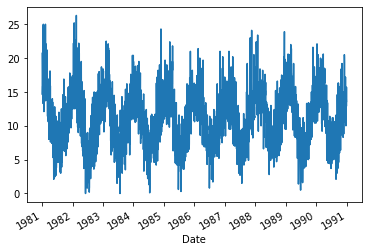

In [1]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

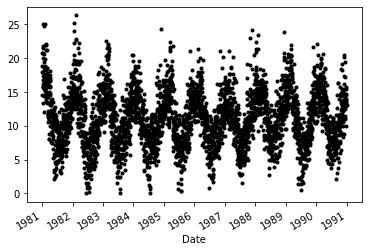

In [2]:
# create a dot plot
series.plot(style='k.')
pyplot.show()

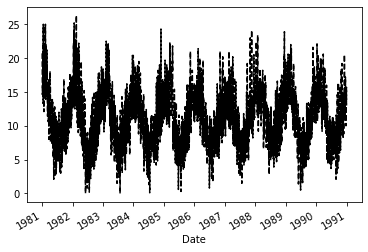

In [4]:
# create a dashed line plot
series.plot(style='k--')
pyplot.show()

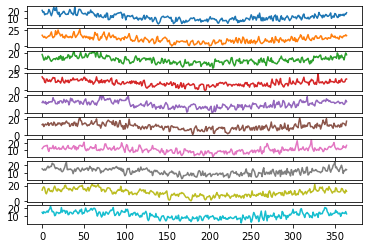

In [6]:
# create stacked line plots
from pandas import DataFrame
from pandas import Grouper

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

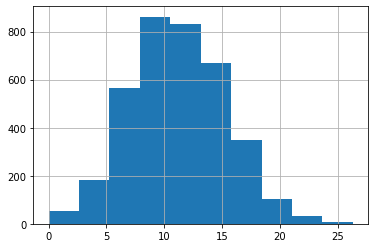

In [7]:
# create a histogram plot
series.hist()
pyplot.show()

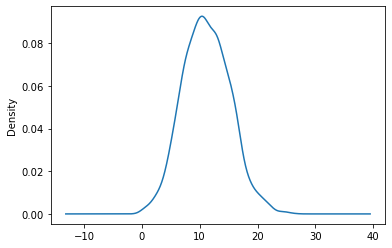

In [8]:
# create a density plot
series.plot(kind='kde')
pyplot.show()

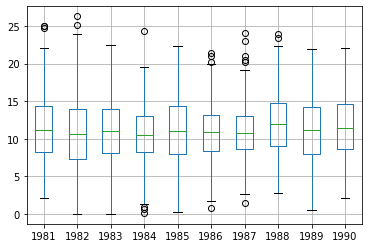

In [9]:
# create a boxplot of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

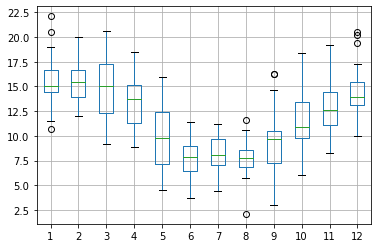

In [10]:
# create a boxplot of monthly data
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

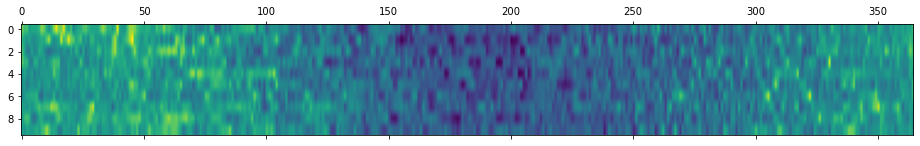

In [11]:
# create a heat map of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

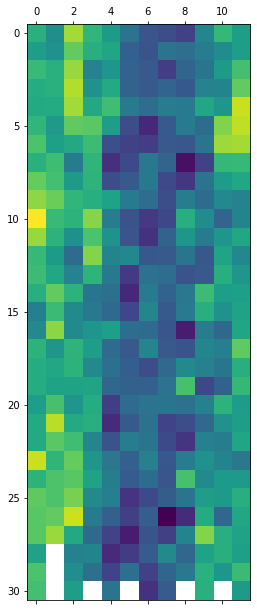

In [12]:
# create a heat map of monthly data
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

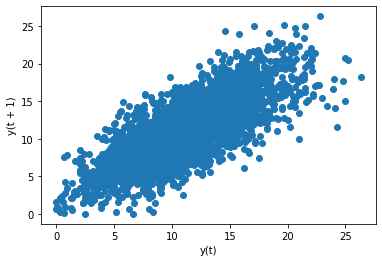

In [13]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

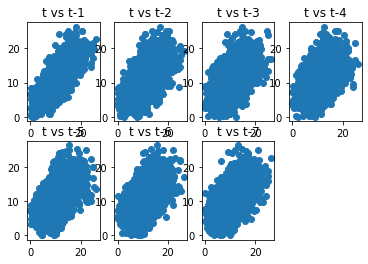

In [14]:
# create multiple scatter plots
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

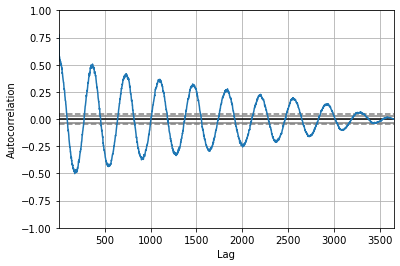

In [20]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

# Resampling and Interpolation

In [20]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


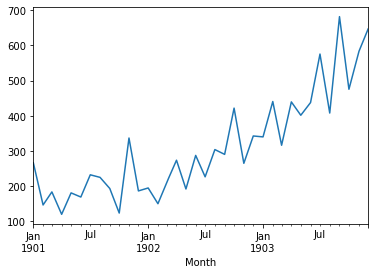

In [22]:
# upsample to daily intervals with linear interpolation
from matplotlib import pyplot
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


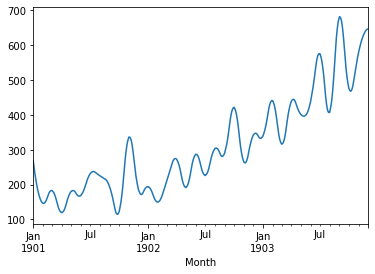

In [23]:
# upsample to daily intervals with spline interpolation
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


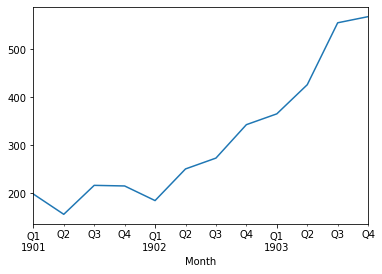

In [24]:
# downsample to quarterly intervals
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


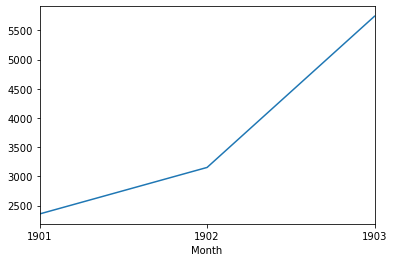

In [25]:
# downsample to yearly intervals
resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.show()

# Power Transforms

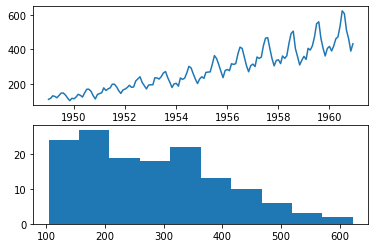

In [1]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

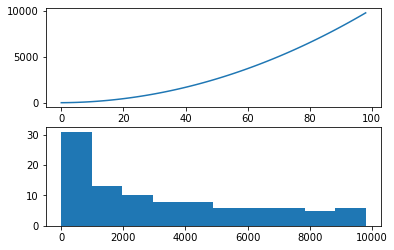

In [27]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

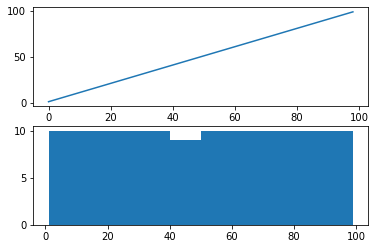

In [28]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

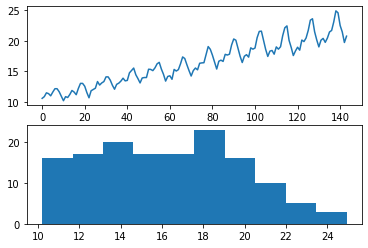

In [29]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

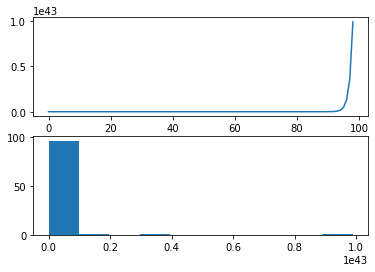

In [5]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

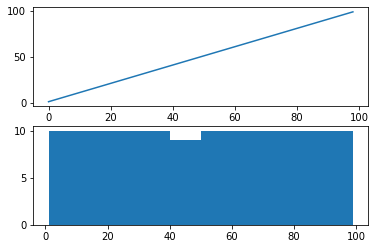

In [6]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

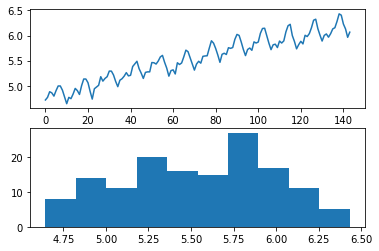

In [30]:
# log transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Функция boxcox () принимает аргумент lambda, который управляет типом выполняемого преобразования. Ниже приведены некоторые значения лямбды:
* lambda = -1,0 - обратное преобразование.
* lambda = -0,5 - это преобразование, обратное квадратному корню.
* lambda = 0,0 - это логарифмическое преобразование.
* lambda = 0,5 - преобразование квадратного корня.
* lambda = 1.0 не является преобразованием. 

Приведем пример преобразования Бокса-Кокса, идентичного лог-преобразованию.

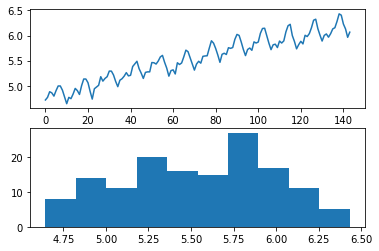

In [32]:
# manually box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Lambda: 0.148023


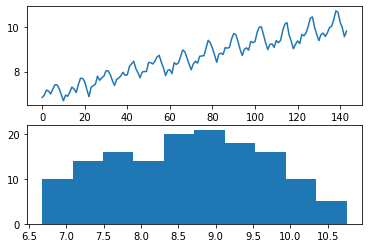

In [33]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Moving Average Smoothing

Пусть размер окна равен 3, преобразованное значение в момент времени (t) вычисляется как среднее значение для предыдущих 3 наблюдений (t-2, t-1, t): obs(t) =1/3*(obs(t - 2) + obs(t - 1) + obs(t))

Ниже приведен пример преобразования набора данных о ежедневных рождениях девочек с помощью скользящего среднего с размером окна 3 дня, выбранным произвольно. Первое скользящее среднее приходится на 3 января и находится следующим образом: obs(t) =1/3*(35+32+30)=32,333

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


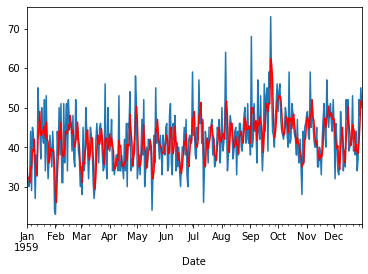

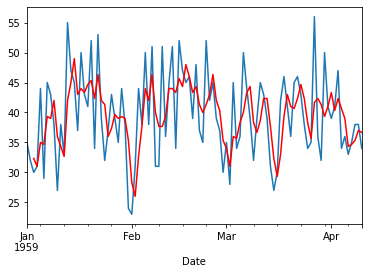

In [34]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

In [35]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


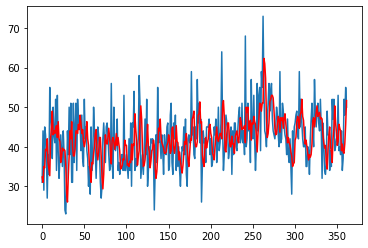

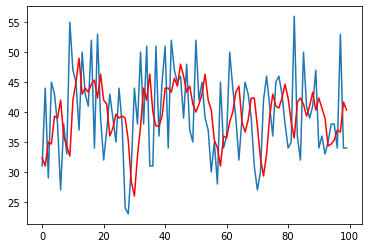

In [36]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()